In [1]:
library(tidyverse)
library(alakazam)
library(shazam)
library(ggplot2)
library(magrittr)
library(ggpubr)
library(stats)
library(stringr)
library(ggrepel)
library(data.table)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the 

In [2]:
hc_tcr <- read.csv('../../../tcr_vdj/publication/input/HC_tcr.csv')
untreated_tcr <- read.csv('../../../tcr_vdj/publication/input/untreated_tcr.csv')
treated_tcr <- read.csv('../../../tcr_vdj/publication/input/treated_tcr.csv')

In [3]:
all_tcr <- rbindlist(list(hc_tcr,untreated_tcr,treated_tcr))

In [4]:
gene_usage_all <- countGenes(all_tcr, gene="v_gene", groups="sample", mode="gene")

In [5]:
meta <- fread('../../../final/seurat/t_cell/tcell_meta.csv')

In [6]:
meta <- meta %>% as_tibble() %>% column_to_rownames('V1')

In [7]:
gene_usage_all %<>% left_join(meta, by = c('sample' = 'orig.ident')) %>% arrange(gene)

In [13]:
gene_usage_all$group <- factor(gene_usage_all$group, levels = c('HC','SLE'))

In [14]:
gene_usage_all$group %>% table()

.
      HC      SLE 
 2048883 10356471 

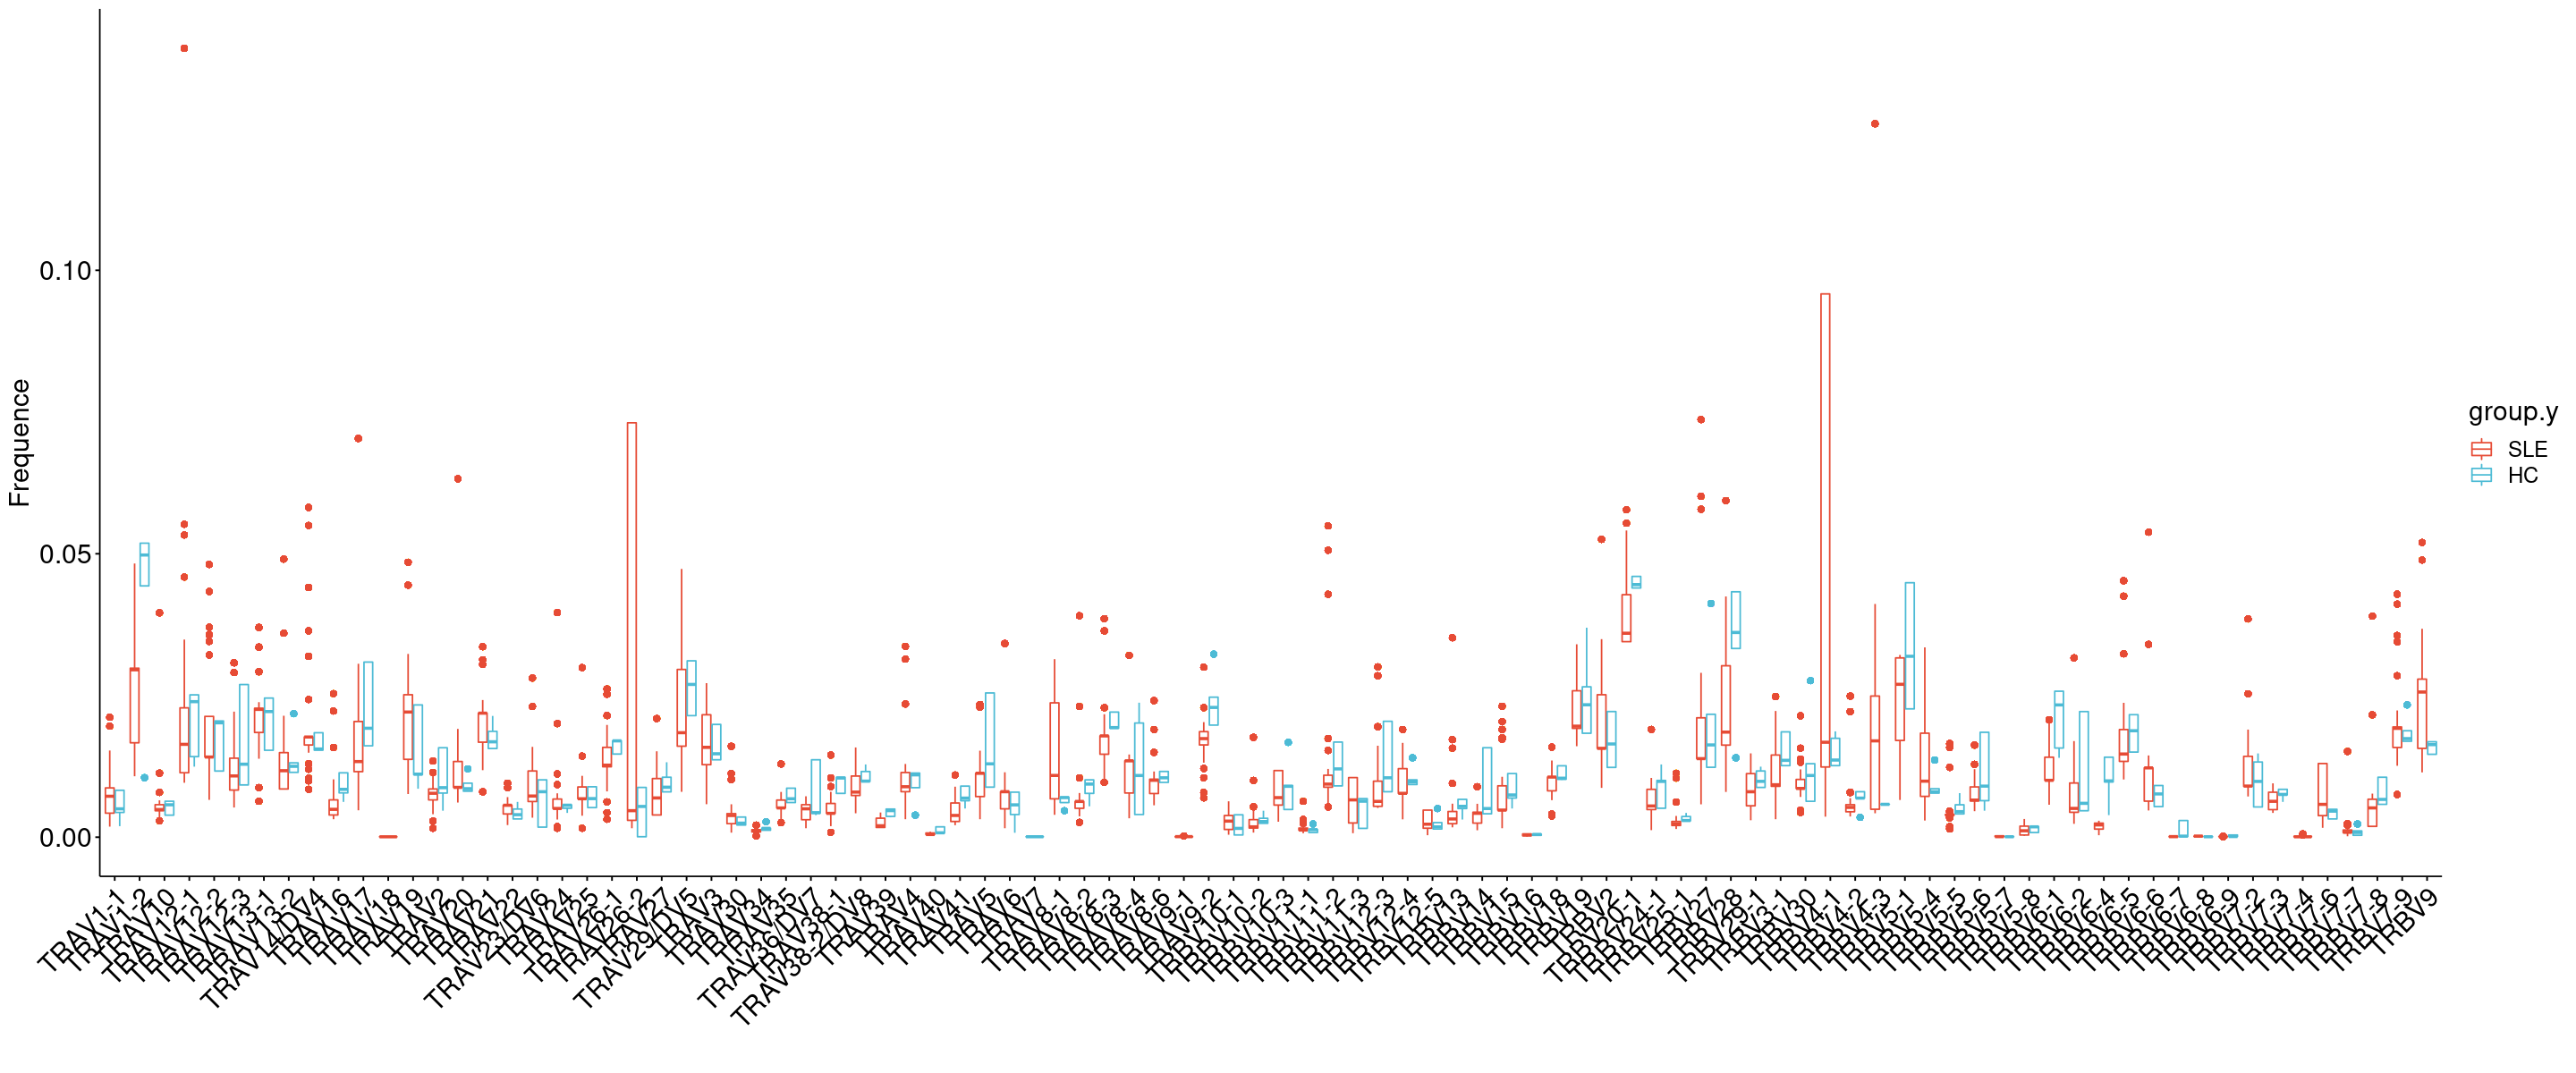

In [32]:
options(repr.plot.width=28, repr.plot.height=10)
f2c <- ggboxplot(gene_usage_all, "gene", "seq_freq", color = "group.y",palette = 'npg', legend = 'right', size=1.2) +
    theme(text=element_text(size=14), axis.text.x=element_text(angle=45, hjust=1)) + xlab('') + ylab('Frequence') + scale_fill_discrete(name='Group')
ggsave('../../../Figure/f2c.svg', f2c ,dpi = 600, width = 10, height = 9)

In [15]:
# gene_usage_all %>% head()
filter_gene <- gene_usage_all %>% group_by(gene) %>% summarise(count = sum(seq_freq)) %>% filter(count >0.01)  %>% select('gene') 
filter_gene$gene

[1] "TRAV1-1"      "TRAV1-2"      "TRAV10"       "TRAV12-1"     "TRAV12-2"    
 [6] "TRAV12-3"     "TRAV13-1"     "TRAV13-2"     "TRAV14/DV4"   "TRAV16"      
[11] "TRAV17"       "TRAV18"       "TRAV19"       "TRAV2"        "TRAV20"      
[16] "TRAV21"       "TRAV22"       "TRAV23/DV6"   "TRAV24"       "TRAV25"      
[21] "TRAV26-1"     "TRAV26-2"     "TRAV27"       "TRAV29/DV5"   "TRAV3"       
[26] "TRAV30"       "TRAV34"       "TRAV35"       "TRAV36/DV7"   "TRAV38-1"    
[31] "TRAV38-2/DV8" "TRAV39"       "TRAV4"        "TRAV40"       "TRAV41"      
[36] "TRAV5"        "TRAV6"        "TRAV7"        "TRAV8-1"      "TRAV8-2"     
[41] "TRAV8-3"      "TRAV8-4"      "TRAV8-6"      "TRAV9-1"      "TRAV9-2"     
[46] "TRBV10-1"     "TRBV10-2"     "TRBV10-3"     "TRBV11-1"     "TRBV11-2"    
[51] "TRBV11-3"     "TRBV12-3"     "TRBV12-4"     "TRBV12-5"     "TRBV13"      
[56] "TRBV14"       "TRBV15"       "TRBV16"       "TRBV18"       "TRBV19"      
[61] "TRBV2"        "TRBV20-1"     "TRBV24-1"     "TRBV25-1"     "TRBV27"      
[66] "TRBV28"       "TRBV29-1"     "TRBV3-1"      "TRBV30"       "TRBV4-1"     
[71] "TRBV4-2"      "TRBV4-3"      "TRBV5-1"      "TRBV5-4"      "TRBV5-5"     
[76] "TRBV5-6"      "TRBV5-7"      "TRBV5-8"      "TRBV6-1"      "TRBV6-2"     
[81] "TRBV6-4"      "TRBV6-5"      "TRBV6-6"      "TRBV6-7"      "TRBV6-8"     
[86] "TRBV6-9"      "TRBV7-2"      "TRBV7-3"      "TRBV7-4"      "TRBV7-6"     
[91] "TRBV7-7"      "TRBV7-8"      "TRBV7-9"      "TRBV9"

In [18]:
options(repr.plot.width=28, repr.plot.height=10)
f2c <- ggboxplot(gene_usage_all[gene_usage_all$gene %in% filter_gene$gene ,], "gene", "seq_freq", color = "group",palette = c('#4EBBD5','#E64B35', 'yellow'), legend = 'right', size=1.2) +
    theme(text=element_text(size=15), axis.text.x=element_text(angle=45, hjust=1), axis.title.y = element_text(size=20)) + xlab('') + ylab('TR gene use frequence') + labs(color='Group')



In [20]:
ggsave('../../../Figure/f2c.svg', f2c, dpi = 600, width = 28, height = 10)

In [21]:
ggsave('../../../Figure/f2c.png', f2c, dpi = 200, width = 28, height = 10)